In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

2024-02-28 17:12:13.048366: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 17:12:13.048408: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 17:12:13.048436: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 17:12:13.055196: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('/tf/notebooks/CustomerChurn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
pd.set_option('display.max_columns', None)

## Preprocessing

In [6]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# customer id not helpful for predicting the churn, so we'll drop it
data = data.drop('customerID', axis=1)

In [8]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Encoding

In [9]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [11]:
def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column] == "object"]

In [12]:
get_uniques(data, get_categorical_columns(data))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'TotalCharges': ['29.85',
  '1889.5',
  '108.15',
  '1840.75',
  '151.65',
  '820.5',
  '1949.4',
  '301.9',
  '3046.05',
  '3487.95',
  '587.45',
  '326.8',
  '5681.1',
  '5036.3',
  '2686.05',
  '7895.15',
  '1022.95',
  '7382

In [13]:
# Total charges column is in object but should be float, so let's change it.
# data['TotalCharges'].astype(float)

In [14]:
sorted(data['TotalCharges'].unique())

[' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05',
 '1004.35',
 '1004.5',
 '1004.75',
 '1005.7',
 '1006.9',
 '1007.8',
 '1007.9',
 '1008.55',
 '1008.7',
 '1009.25',
 '101.1',
 '101.45',
 '101.65',
 '101.9',
 '1010',
 '1011.05',
 '1011.5',
 '1011.8',
 '1012.4',
 '1013.05',
 '1013.2',
 '1013.35',
 '1013.6',
 '1014.25',
 '1016.7',
 '1017.35',
 '102.45',
 '102.5',
 '102.75',
 '1020.2',
 '1020.75',
 '1021.55',
 '1021.75',
 '1021.8',
 '1022.5',
 '1022.6',
 '1022.95',
 '1023.75',
 '1023.85',
 '1023.9',
 '1023.95',
 '1024',
 '1024.65',
 '1024.7',
 '1025.05',
 '1025.15',
 '1025.95',
 '1026.35',
 '1027.25',
 '1028.75',
 '1028.9',
 '1029.35',
 '1029.75',
 '1029.8',
 '103.7',
 '1031.1',
 '1031.4',
 '1031.7',
 '1032',
 '1032.05',
 '1033',
 '1033.9',
 '1033.95',
 '1035.5',
 '1035.7',
 '1036',
 '1036.75',
 '1037.75',
 '1039.45',
 '104.2',
 '104.3',
 '1041.8',
 '1042.65',
 '1043.3',
 '1043.35',
 '1043.4',
 '1043.8',
 '1045.25',
 '1046.1',
 '1046.2',
 

In [15]:
# The first space is creating problems and refraining us from converting from object to float
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

data['TotalCharges'] = data['TotalCharges'].astype(float)

data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [16]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
get_uniques(data, get_categorical_columns(data))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [18]:
binary_features = ['gender', 'Partner', 'Dependents', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'PhoneService',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

ordinal_features = ['InternetService', 'Contract']

nominal_features = ['PaymentMethod']

target_column = 'Churn'

In [19]:
internet_ordering = ['No', 'DSL', 'Fiber optic']

contract_ordering = ['Month-to-month', 'One year', 'Two year']

In [20]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x:1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    dummies = dummies.astype(int)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df
    

In [21]:
data = binary_encode(data, 'gender', 'Male')


yes_features = ['Partner', 'Dependents', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'PhoneService',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for feature in yes_features:
    data = binary_encode(data, feature, 'Yes')

data = ordinal_encode(data, 'InternetService', internet_ordering)
data = ordinal_encode(data, 'Contract', contract_ordering)

data = onehot_encode(data, 'PaymentMethod')

In [22]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,29.85,29.85,No,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,56.95,1889.50,No,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,53.85,108.15,Yes,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,42.30,1840.75,No,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,70.70,151.65,Yes,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,84.80,1990.50,No,0,0,0,1
7039,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,103.20,7362.90,No,0,1,0,0
7040,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,29.60,346.45,No,0,0,1,0
7041,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,74.40,306.60,Yes,0,0,0,1


In [23]:
data = binary_encode(data, 'Churn', 'Yes')

In [24]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,84.80,1990.50,0,0,0,0,1
7039,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,103.20,7362.90,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,29.60,346.45,0,0,0,1,0
7041,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,74.40,306.60,1,0,0,0,1


## Splitting and Scaling

In [25]:
y = data['Churn']
X = data.drop('Churn', axis=1)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   int64  
 1   SeniorCitizen              7043 non-null   int64  
 2   Partner                    7043 non-null   int64  
 3   Dependents                 7043 non-null   int64  
 4   tenure                     7043 non-null   int64  
 5   PhoneService               7043 non-null   int64  
 6   MultipleLines              7043 non-null   int64  
 7   InternetService            7043 non-null   int64  
 8   OnlineSecurity             7043 non-null   int64  
 9   OnlineBackup               7043 non-null   int64  
 10  DeviceProtection           7043 non-null   int64  
 11  TechSupport                7043 non-null   int64  
 12  StreamingTV                7043 non-null   int64  
 13  StreamingMovies            7043 non-null   int64

In [27]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [28]:
data['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Training the model

In [31]:
X.shape

(7043, 22)

In [32]:
y.shape

(7043,)

In [34]:
y.sum() / len(y) # checking the % value of 1 in our churn feature i.e. 26%  ---> sckewed classes ---> can't use acc as metric , we'll use roc-auc as one

0.2653698707936959

In [35]:
inputs = tf.keras.Input(shape=(22, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

batch_size = 64
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/100


2024-02-28 17:21:53.604481: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-02-28 17:21:53.604506: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: b5909d7b6118
2024-02-28 17:21:53.604513: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: b5909d7b6118
2024-02-28 17:21:53.604656: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.161.7
2024-02-28 17:21:53.604676: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.161.7
2024-02-28 17:21:53.604682: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.161.7


62/62 [==============================] - 1s 3ms/step - loss: 0.4998 - auc: 0.7501 - val_loss: 0.4378 - val_auc: 0.8202 - lr: 0.0010
Epoch 2/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4160 - auc: 0.8436 - val_loss: 0.4274 - val_auc: 0.8284 - lr: 0.0010
Epoch 3/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4061 - auc: 0.8522 - val_loss: 0.4256 - val_auc: 0.8305 - lr: 0.0010
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4001 - auc: 0.8574 - val_loss: 0.4260 - val_auc: 0.8296 - lr: 0.0010
Epoch 5/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3953 - auc: 0.8610 - val_loss: 0.4325 - val_auc: 0.8272 - lr: 0.0010
Epoch 6/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3917 - auc: 0.8642 - val_loss: 0.4301 - val_auc: 0.8290 - lr: 0.0010
Epoch 7/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3883 - auc: 0.8668 - val_loss: 0.4280 - val_auc: 0.8276 - lr: 0.0010
Epoc

## Results

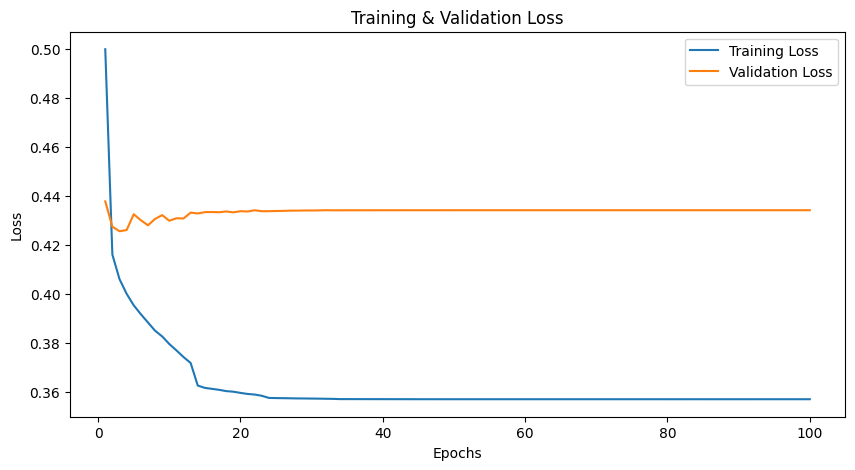

In [40]:
plt.figure(figsize=(10, 5))

epochs_range = range(1, epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")

plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [41]:
# Training without callback


inputs = tf.keras.Input(shape=(22, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

batch_size = 64
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
)

Epoch 1/100
62/62 [==============================] - 1s 3ms/step - loss: 0.4712 - auc: 0.7872 - val_loss: 0.4295 - val_auc: 0.8227
Epoch 2/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4129 - auc: 0.8465 - val_loss: 0.4240 - val_auc: 0.8286
Epoch 3/100
62/62 [==============================] - 0s 1ms/step - loss: 0.4043 - auc: 0.8541 - val_loss: 0.4290 - val_auc: 0.8273
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3964 - auc: 0.8610 - val_loss: 0.4246 - val_auc: 0.8289
Epoch 5/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3923 - auc: 0.8638 - val_loss: 0.4296 - val_auc: 0.8274
Epoch 6/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3882 - auc: 0.8674 - val_loss: 0.4287 - val_auc: 0.8278
Epoch 7/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3856 - auc: 0.8692 - val_loss: 0.4275 - val_auc: 0.8294
Epoch 8/100
62/62 [==============================] - 0s 1ms/step - loss: 0.3831 - a

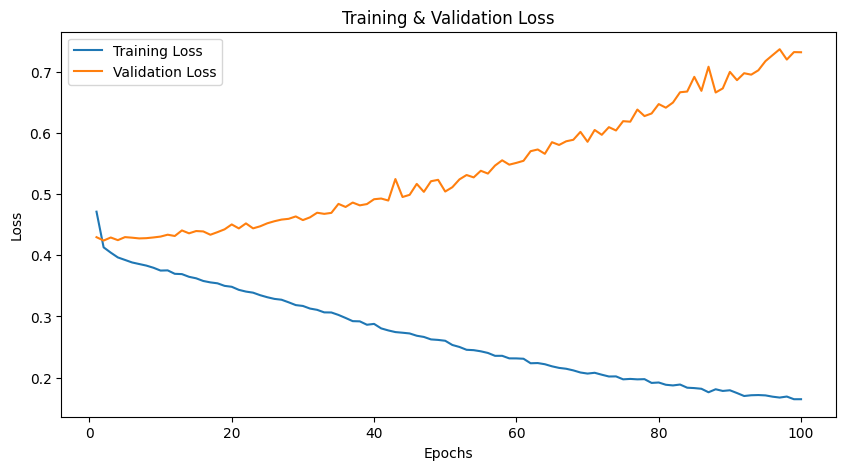

In [42]:
plt.figure(figsize=(10, 5))

epochs_range = range(1, epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")

plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [43]:
np.argmin(val_loss)

1

In [50]:
# Training without callback for 5 epochs

inputs = tf.keras.Input(shape=(22, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
)

Epoch 1/5
62/62 [==============================] - 1s 3ms/step - loss: 0.5103 - auc: 0.7303 - val_loss: 0.4423 - val_auc: 0.8152
Epoch 2/5
62/62 [==============================] - 0s 1ms/step - loss: 0.4222 - auc: 0.8385 - val_loss: 0.4281 - val_auc: 0.8262
Epoch 3/5
62/62 [==============================] - 0s 1ms/step - loss: 0.4098 - auc: 0.8491 - val_loss: 0.4273 - val_auc: 0.8287
Epoch 4/5
62/62 [==============================] - 0s 1ms/step - loss: 0.4017 - auc: 0.8566 - val_loss: 0.4367 - val_auc: 0.8289
Epoch 5/5
62/62 [==============================] - 0s 1ms/step - loss: 0.3985 - auc: 0.8592 - val_loss: 0.4243 - val_auc: 0.8296


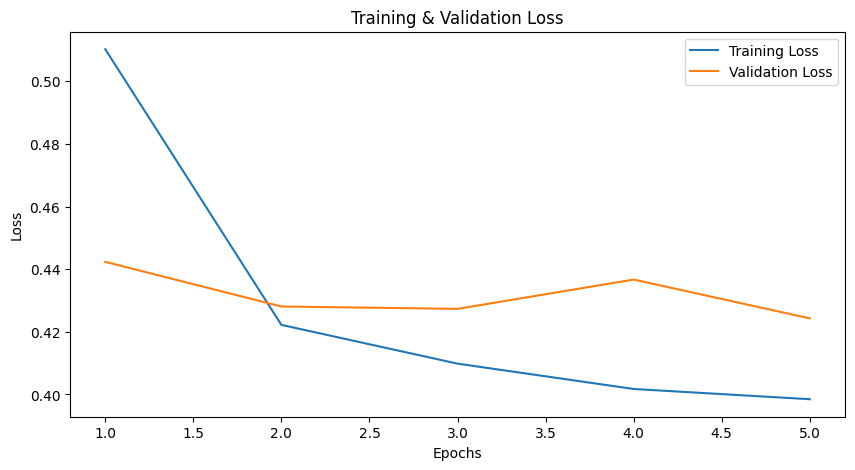

In [51]:
plt.figure(figsize=(10, 5))

epochs_range = range(1, epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")

plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [52]:
model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 615us/step - loss: 0.4440 - auc: 0.8331


[0.44399335980415344, 0.8331173658370972]

In [53]:
inputs = tf.keras.Input(shape=(22, ))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 0.4644 - auc: 0.7944 - val_loss: 0.4304 - val_auc: 0.8227 - lr: 0.0010
Epoch 2/50
62/62 [==============================] - 0s 1ms/step - loss: 0.4170 - auc: 0.8426 - val_loss: 0.4311 - val_auc: 0.8303 - lr: 0.0010
Epoch 3/50
62/62 [==============================] - 0s 1ms/step - loss: 0.4087 - auc: 0.8502 - val_loss: 0.4235 - val_auc: 0.8303 - lr: 0.0010
Epoch 4/50
62/62 [==============================] - 0s 1ms/step - loss: 0.4015 - auc: 0.8561 - val_loss: 0.4270 - val_auc: 0.8287 - lr: 0.0010
Epoch 5/50
62/62 [==============================] - 0s 1ms/step - loss: 0.3967 - auc: 0.8606 - val_loss: 0.4274 - val_auc: 0.8292 - lr: 0.0010
Epoch 6/50
62/62 [==============================] - 0s 1ms/step - loss: 0.3920 - auc: 0.8639 - val_loss: 0.4270 - val_auc: 0.8269 - lr: 0.0010
Epoch 7/50
62/62 [==============================] - 0s 1ms/step - loss: 0.3895 - auc: 0.8667 - val_loss: 0.4318 - val_auc: 0.8276 - lr: 0.0010

In [55]:
model.evaluate(X_test, y_test) # worse than before so 5 epochs without call back was better

67/67 [==============================] - 0s 614us/step - loss: 0.4529 - auc: 0.8303


[0.45290154218673706, 0.8302775621414185]